In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
rack1_1 = pd.read_csv('./dscpdata/Macpherson_1_5_4_24.csv')

In [3]:
rack1_1.head()

,Timestamp,Number of Worms (non-counted),Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Light Intensity,Temp01,Hum01,Heat01,SoilM01,SoilM02,Grams of Compost Harvested,Buzzer
0,"5 Apr 2024, 10:00 AM",14,193,197,193,193,193,193,NaN,27.4,93.0,42.0,1.0,1.0,NaN,Off
1,"5 Apr 2024, 10:01 AM",14,189,159,172,145,156,145,NaN,27.4,93.0,42.0,1.0,1.0,NaN,Off
2,"5 Apr 2024, 10:02 AM",14,163,159,160,145,142,140,NaN,27.4,95.0,42.0,1.0,1.0,NaN,Off
3,"5 Apr 2024, 10:03 AM",14,196,152,162,143,193,173,NaN,27.4,97.0,42.0,1.0,1.0,NaN,Off
4,"5 Apr 2024, 10:04 AM",14,142,176,185,162,181,187,NaN,27.4,95.0,42.0,1.0,1.0,NaN,Off


In [4]:
rack1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      818 non-null    object 
 1   Number of Worms (non-counted)  818 non-null    object 
 2   Phosphorous01                  818 non-null    object 
 3   Phosphorous02                  818 non-null    object 
 4   Nitrogen01                     818 non-null    object 
 5   Nitrogen02                     818 non-null    object 
 6   Potassium01                    818 non-null    object 
 7   Potassium02                    818 non-null    object 
 8   Light Intensity                0 non-null      float64
 9   Temp01                         633 non-null    float64
 10  Hum01                          633 non-null    float64
 11  Heat01                         633 non-null    float64
 12  SoilM01                        667 non-null    flo

In [5]:
rack1_1.describe()

,Light Intensity,Temp01,Hum01,Heat01,SoilM01,SoilM02
count,0.0,633.000000,633.000000,633.000000,667.000000,667.000000
mean,NaN,31.453239,95.720379,39.006319,0.844078,0.998501
std,NaN,2.108811,3.268450,11.919029,0.363054,0.038720
min,NaN,27.400000,84.000000,0.000000,0.000000,0.000000
25%,NaN,31.700000,94.000000,42.000000,1.000000,1.000000
50%,NaN,32.100000,96.000000,42.000000,1.000000,1.000000
75%,NaN,32.800000,98.000000,43.000000,1.000000,1.000000
max,NaN,34.600000,99.000000,50.000000,1.000000,1.000000


### Looking at Missing Data for Each Variable

In [6]:
rack1_1.isnull().sum()

Timestamp                          0
Number of Worms (non-counted)      0
Phosphorous01                      0
Phosphorous02                      0
Nitrogen01                         0
Nitrogen02                         0
Potassium01                        0
Potassium02                        0
Light Intensity                  818
Temp01                           185
Hum01                            185
Heat01                           185
SoilM01                          151
SoilM02                          151
Grams of Compost Harvested       815
Buzzer                           225
dtype: int64

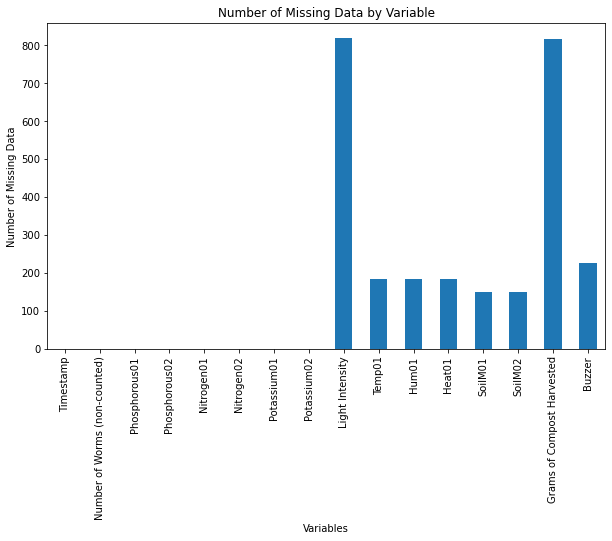

In [7]:
#Visualising missing data
color = []
missing_counts = rack1_1.isnull().sum()

plt.figure(figsize=(10, 6))  # Set the figure size

missing_counts.plot(kind='bar')


plt.title('Number of Missing Data by Variable')  # Set the title
plt.xlabel('Variables')  # Set the x-axis label
plt.ylabel('Number of Missing Data')  # Set the y-axis label

plt.show()

### Fixing Wrong Data Types

In [8]:
for column in ['Phosphorous01', 'Phosphorous02', 'Nitrogen01', 'Nitrogen02', 'Potassium01', 'Potassium02']:
    rack1_1[column] = pd.to_numeric(rack1_1[column], errors='coerce') 
    rack1_1[column] = rack1_1[column].fillna(0)  
    rack1_1[column] = rack1_1[column].astype(int)  

rack1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      818 non-null    object 
 1   Number of Worms (non-counted)  818 non-null    object 
 2   Phosphorous01                  818 non-null    int32  
 3   Phosphorous02                  818 non-null    int32  
 4   Nitrogen01                     818 non-null    int32  
 5   Nitrogen02                     818 non-null    int32  
 6   Potassium01                    818 non-null    int32  
 7   Potassium02                    818 non-null    int32  
 8   Light Intensity                0 non-null      float64
 9   Temp01                         633 non-null    float64
 10  Hum01                          633 non-null    float64
 11  Heat01                         633 non-null    float64
 12  SoilM01                        667 non-null    flo

In [9]:
rack1_1['Timestamp'] = pd.to_datetime(rack1_1['Timestamp'])


### Trend over time

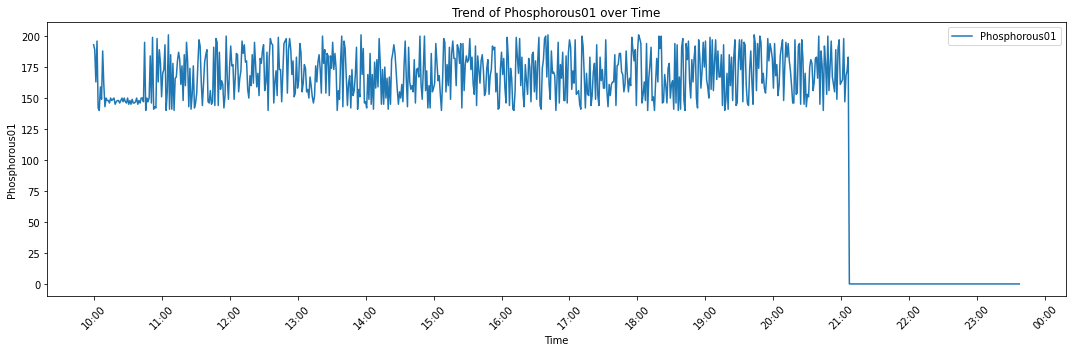

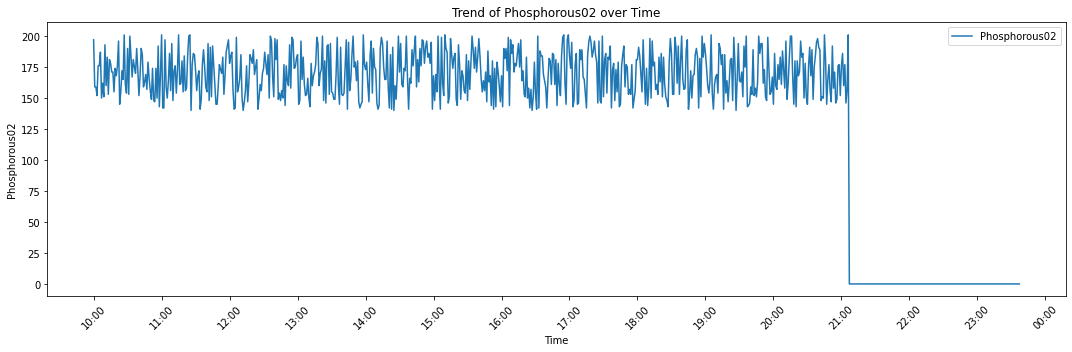

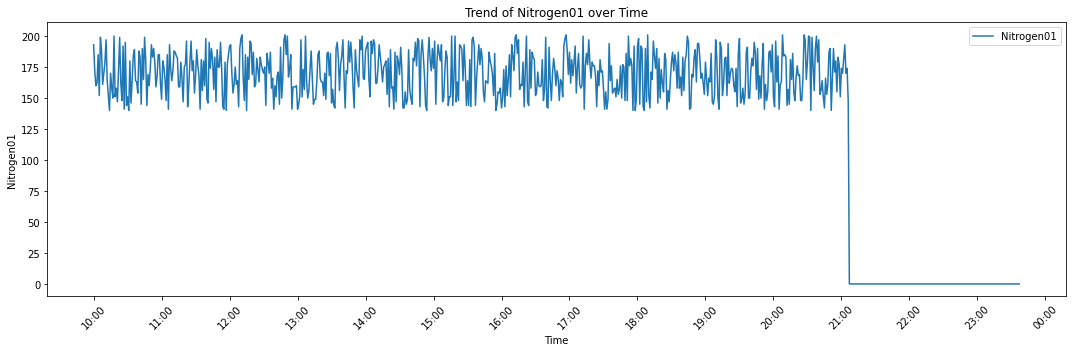

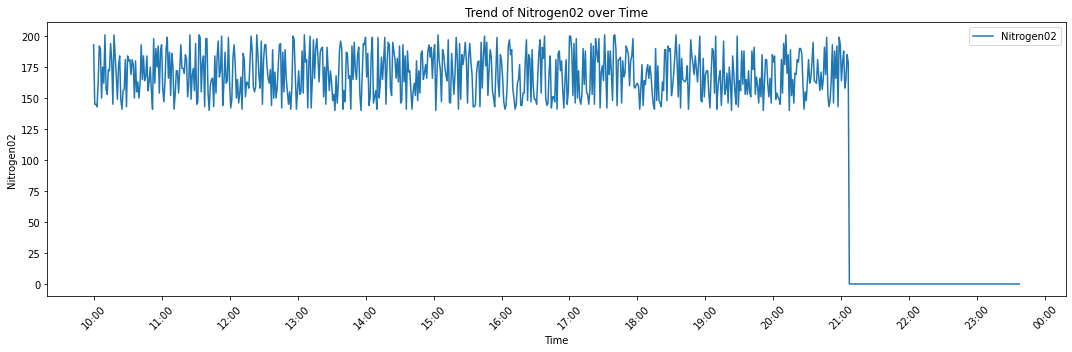

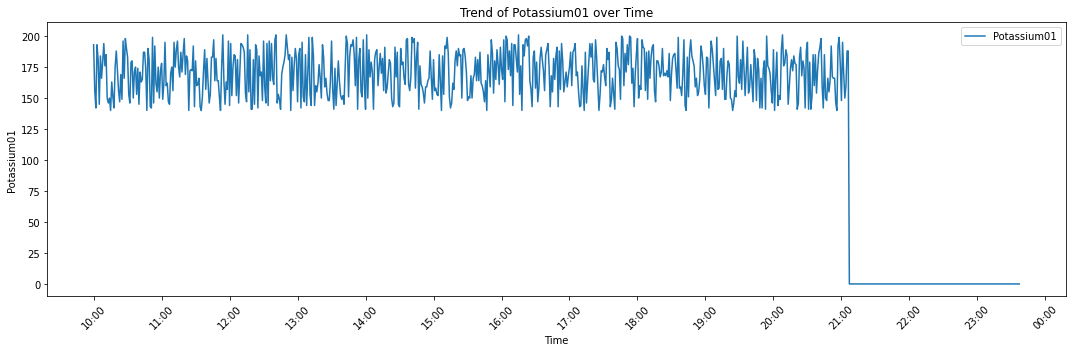

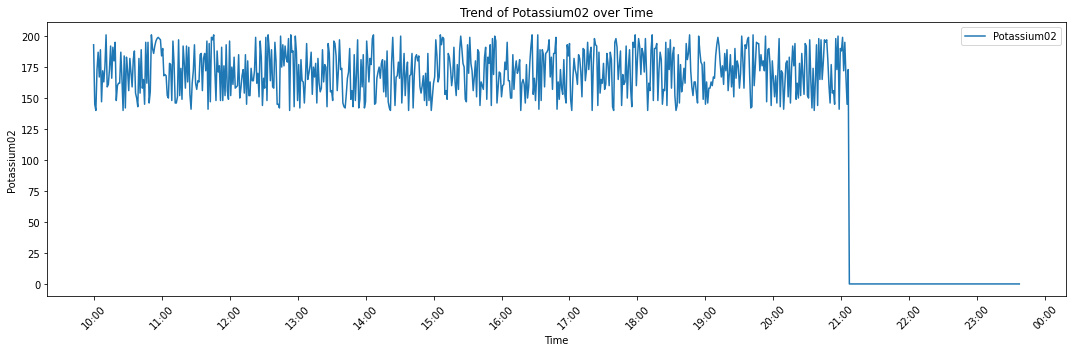

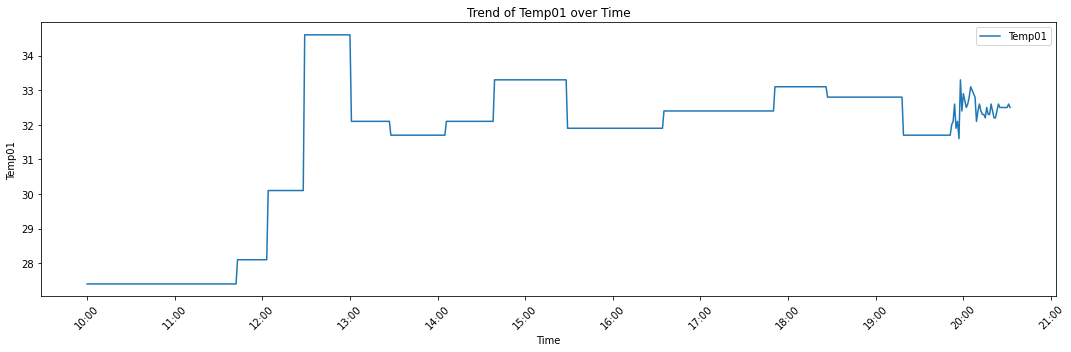

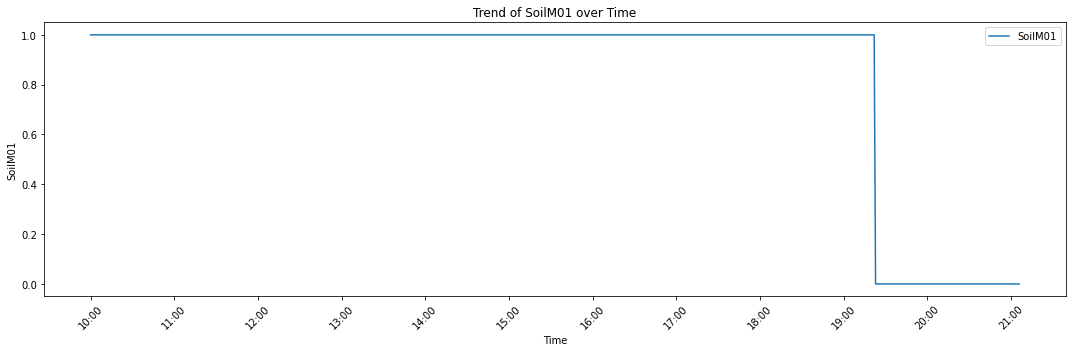

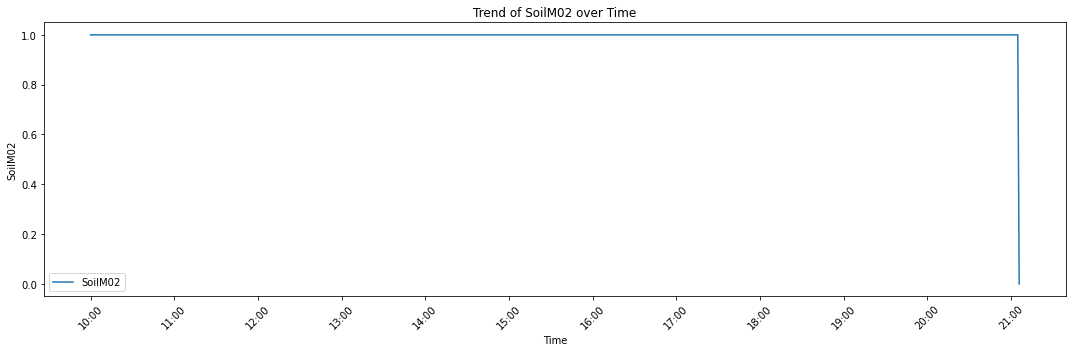

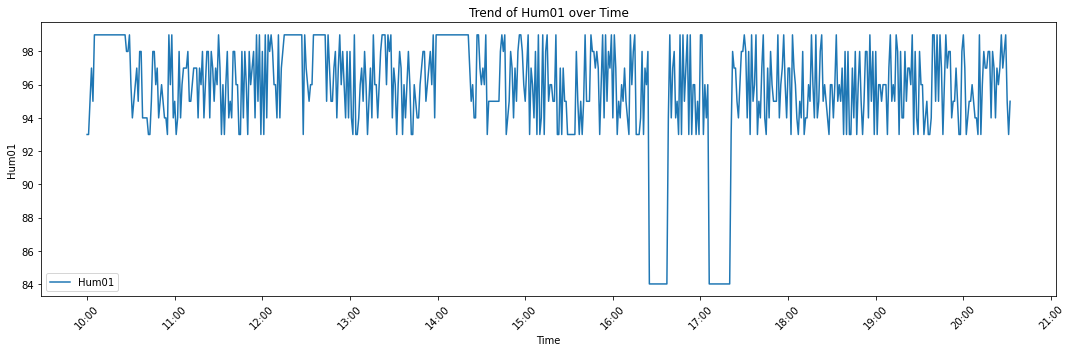

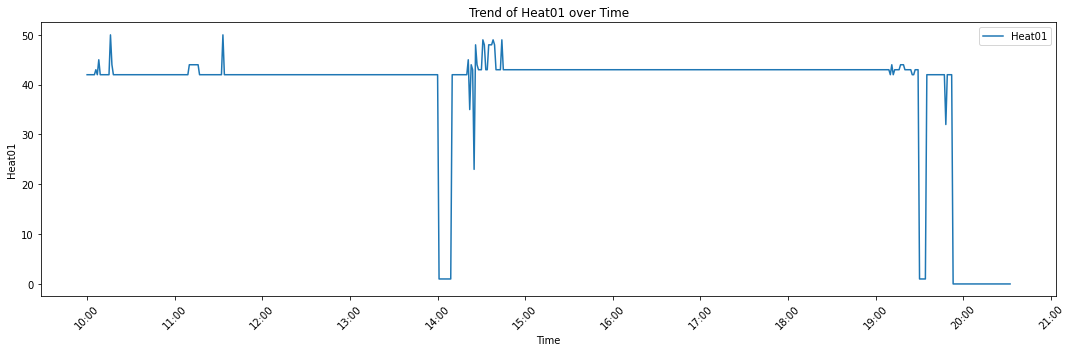

In [10]:
variables_to_plot = ['Phosphorous01', 'Phosphorous02', 'Nitrogen01', 'Nitrogen02', 
                     'Potassium01', 'Potassium02', 'Temp01', 'SoilM01', 'SoilM02',
                     'Hum01', 'Heat01']

for variable in variables_to_plot:
    plt.figure(figsize=(15, 5))
    plt.plot(rack1_1['Timestamp'], rack1_1[variable], label=variable)
    plt.title(f'Trend of {variable} over Time')
    plt.xlabel('Time')
    plt.ylabel(variable)

    # Configure x-axis with time formatting
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Locate hours every hour
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Show only hours and minutes

    plt.xticks(rotation=45)  # Rotate for better readability
    plt.legend()
    plt.tight_layout()  # Adjust layout to fit everything
    plt.show()

### NPK RATIO

In [11]:
# Convert the necessary columns to numeric, coercing errors for any non-numeric data
rack1_1['Phosphorous01'] = pd.to_numeric(rack1_1['Phosphorous01'], errors='coerce')
rack1_1['Phosphorous02'] = pd.to_numeric(rack1_1['Phosphorous02'], errors='coerce')
rack1_1['Nitrogen01'] = pd.to_numeric(rack1_1['Nitrogen01'], errors='coerce')
rack1_1['Nitrogen02'] = pd.to_numeric(rack1_1['Nitrogen02'], errors='coerce')
rack1_1['Potassium01'] = pd.to_numeric(rack1_1['Potassium01'], errors='coerce')
rack1_1['Potassium02'] = pd.to_numeric(rack1_1['Potassium02'], errors='coerce')

# Now, calculate the average values for N, P, and K
rack1_1['Average_Phosphorous'] = (rack1_1['Phosphorous01'] + rack1_1['Phosphorous02']) / 2
rack1_1['Average_Nitrogen'] = (rack1_1['Nitrogen01'] + rack1_1['Nitrogen02']) / 2
rack1_1['Average_Potassium'] = (rack1_1['Potassium01'] + rack1_1['Potassium02']) / 2

# This will create a string like "N:P:K" for each entry using the averages
rack1_1['NPK_Ratio'] = rack1_1['Average_Nitrogen'].astype(str) + ':' + \
                       rack1_1['Average_Phosphorous'].astype(str) + ':' + \
                       rack1_1['Average_Potassium'].astype(str)



# Check the new variable
rack1_1[['NPK_Ratio']].head()

,NPK_Ratio
0,193.0:195.0:193.0
1,158.5:174.0:150.5
2,152.5:161.0:141.0
3,152.5:174.0:183.0
4,173.5:159.0:184.0


In [12]:
# Ensure all N, P, and K columns are numeric
import pandas as pd

# Assuming rack1_1 is your DataFrame and the data has been loaded into it.

# Convert the 'Phosphorous', 'Nitrogen', and 'Potassium' columns to numeric, coercing errors to NaN
rack1_1['Phosphorous01'] = pd.to_numeric(rack1_1['Phosphorous01'], errors='coerce')
rack1_1['Phosphorous02'] = pd.to_numeric(rack1_1['Phosphorous02'], errors='coerce')
rack1_1['Nitrogen01'] = pd.to_numeric(rack1_1['Nitrogen01'], errors='coerce')
rack1_1['Nitrogen02'] = pd.to_numeric(rack1_1['Nitrogen02'], errors='coerce')
rack1_1['Potassium01'] = pd.to_numeric(rack1_1['Potassium01'], errors='coerce')
rack1_1['Potassium02'] = pd.to_numeric(rack1_1['Potassium02'], errors='coerce')

# Calculate the sum of the averaged readings for N, P, and K
rack1_1['Sum_NPK_Avg'] = ((rack1_1['Nitrogen01'] + rack1_1['Nitrogen02']) / 2) + \
                         ((rack1_1['Phosphorous01'] + rack1_1['Phosphorous02']) / 2) + \
                         ((rack1_1['Potassium01'] + rack1_1['Potassium02']) / 2)

# Calculate the percentage of N, P, and K relative to the sum of the averaged readings
rack1_1['N_Percentage'] = ((rack1_1['Nitrogen01'] + rack1_1['Nitrogen02']) / 2) / rack1_1['Sum_NPK_Avg'] * 100
rack1_1['P_Percentage'] = ((rack1_1['Phosphorous01'] + rack1_1['Phosphorous02']) / 2) / rack1_1['Sum_NPK_Avg'] * 100
rack1_1['K_Percentage'] = ((rack1_1['Potassium01'] + rack1_1['Potassium02']) / 2) / rack1_1['Sum_NPK_Avg'] * 100

# Check the new variables by displaying the first few rows
print(rack1_1[['N_Percentage', 'P_Percentage', 'K_Percentage']].head())


   N_Percentage  P_Percentage  K_Percentage
0     33.218589     33.562823     33.218589
1     32.815735     36.024845     31.159420
2     33.553355     35.423542     31.023102
3     29.931305     34.151129     35.917566
4     33.591481     30.784124     35.624395


In [13]:
# Calculate the mean for N, P, and K percentages
average_N_percentage = rack1_1['N_Percentage'].mean()
average_P_percentage = rack1_1['P_Percentage'].mean()
average_K_percentage = rack1_1['K_Percentage'].mean()

# Output the averages
average_N_percentage, average_P_percentage, average_K_percentage

(33.29222784454702, 33.22182011868942, 33.485952036763535)

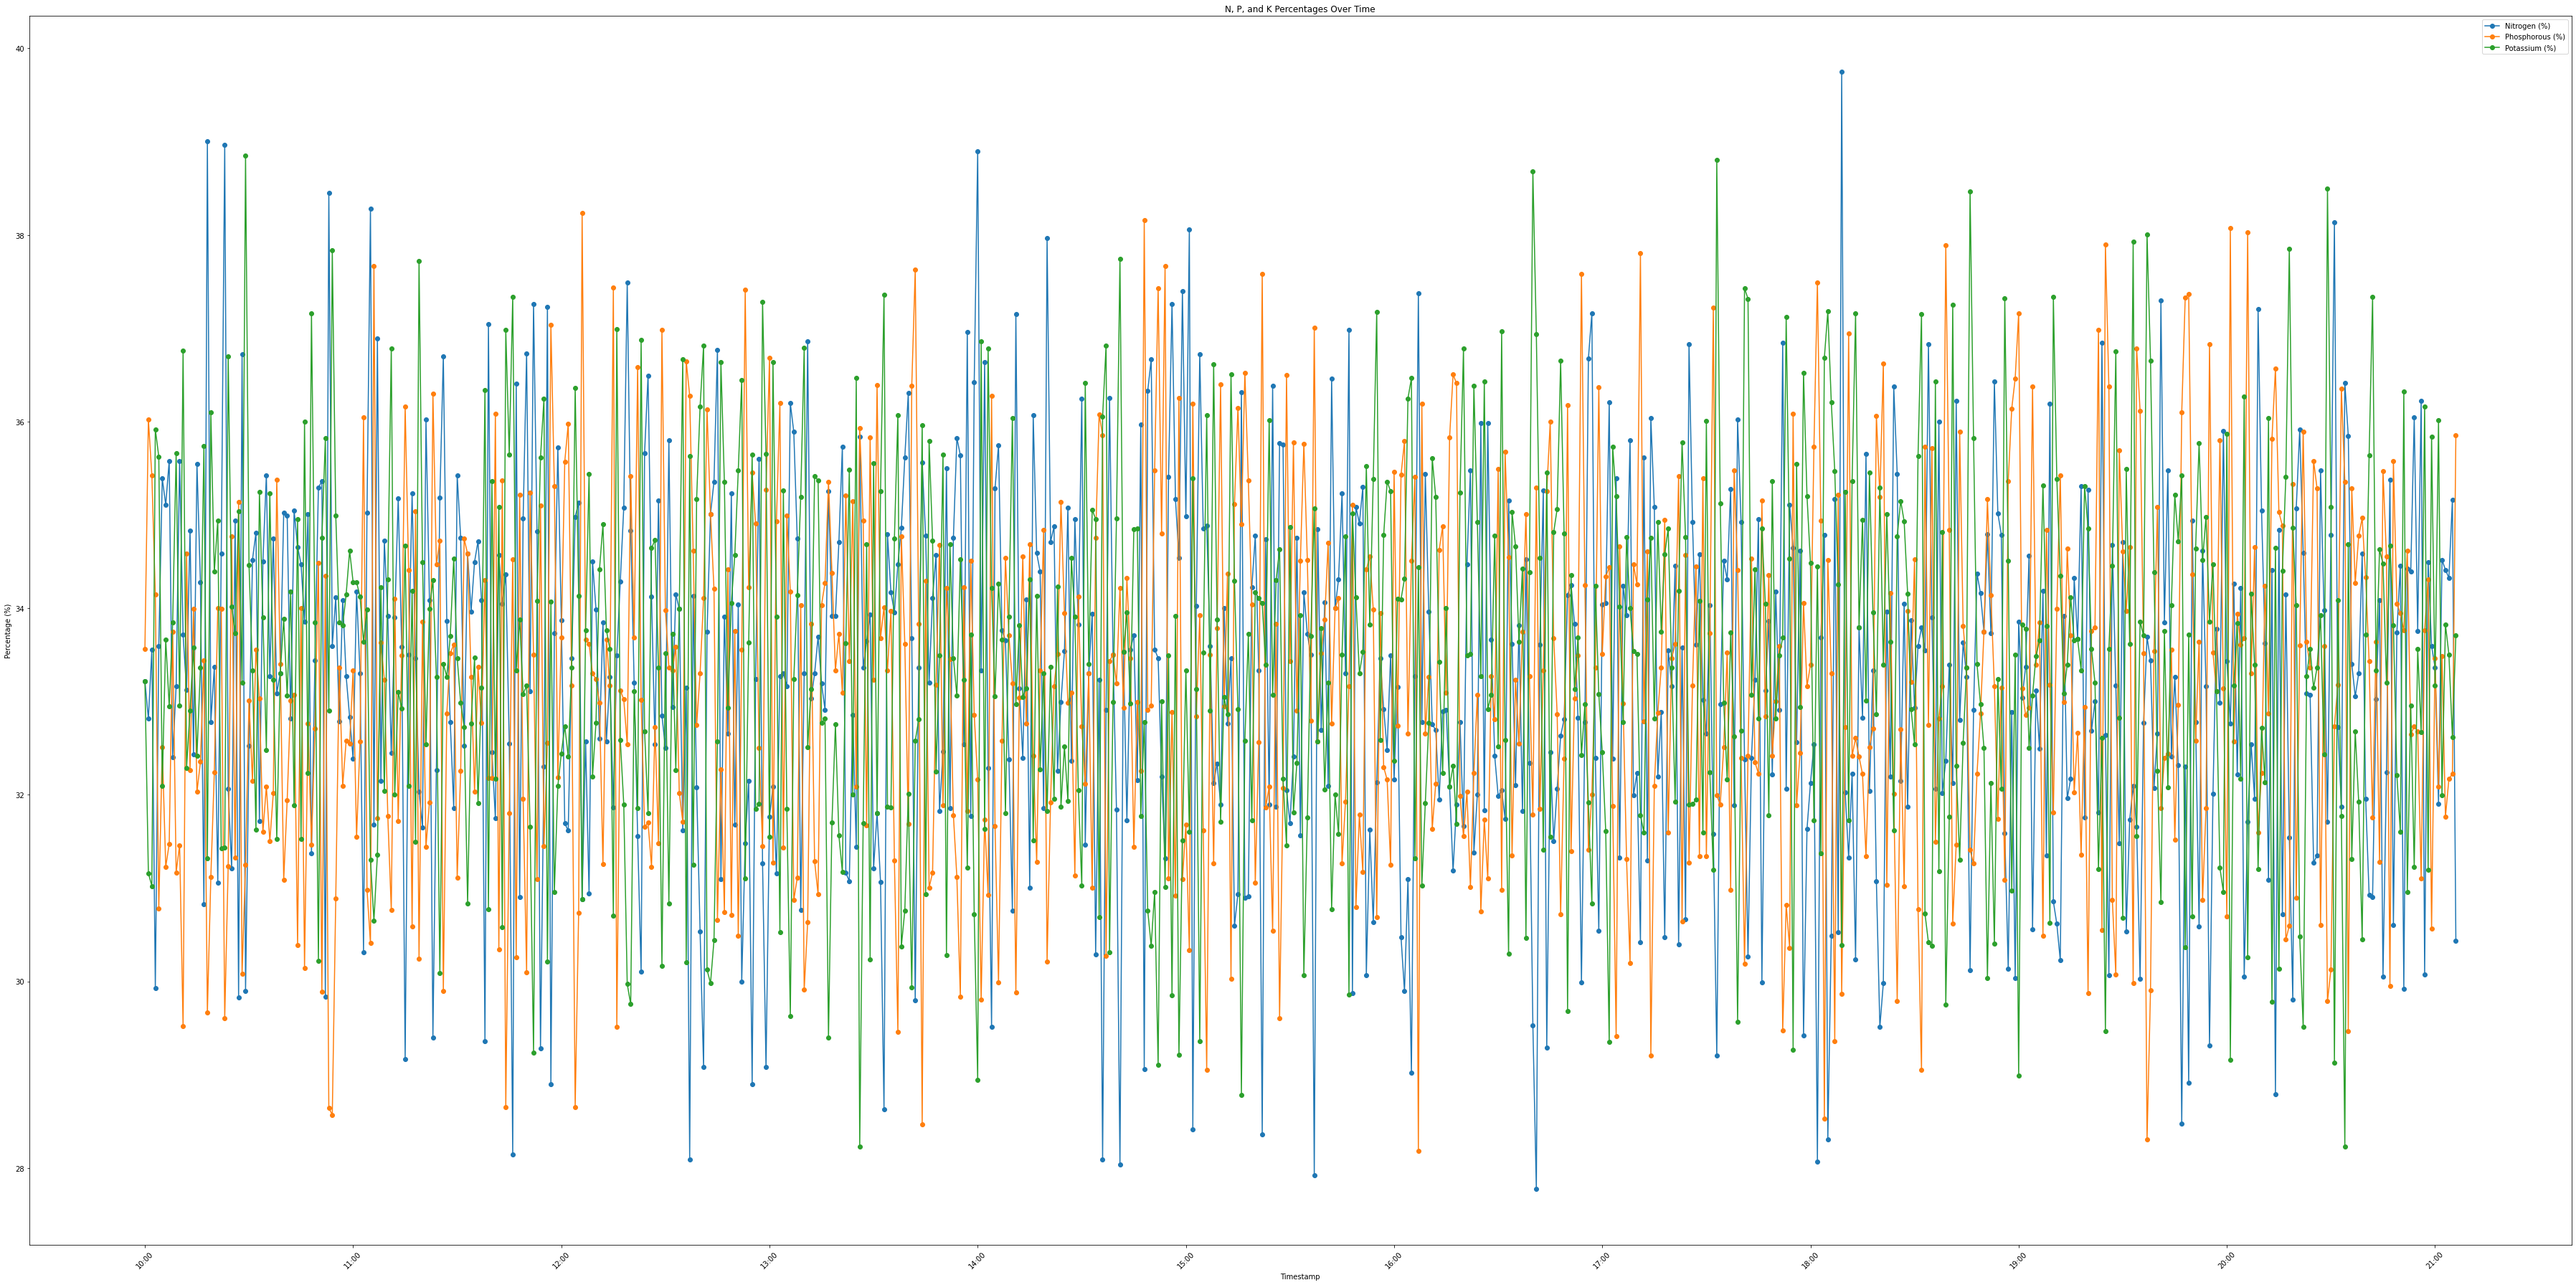

In [14]:
import matplotlib.dates as mdates
plt.figure(figsize=(50, 25))

# Plot each nutrient's percentage
plt.plot(rack1_1['Timestamp'], rack1_1['N_Percentage'], label='Nitrogen (%)', marker='o')
plt.plot(rack1_1['Timestamp'], rack1_1['P_Percentage'], label='Phosphorous (%)', marker='o')
plt.plot(rack1_1['Timestamp'], rack1_1['K_Percentage'], label='Potassium (%)', marker='o')

# Adding labels and title
plt.title('N, P, and K Percentages Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Percentage (%)')

# Rotate the x-axis labels to prevent overlap
plt.xticks(rotation=45)

# Configure x-axis with time formatting
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Locate hours every hour
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Show only hours and minutes
# Add legend and show plot
# Adding a legend to distinguish between lines
plt.legend()
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Locate hours every hour
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Show only hours and minutes
# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

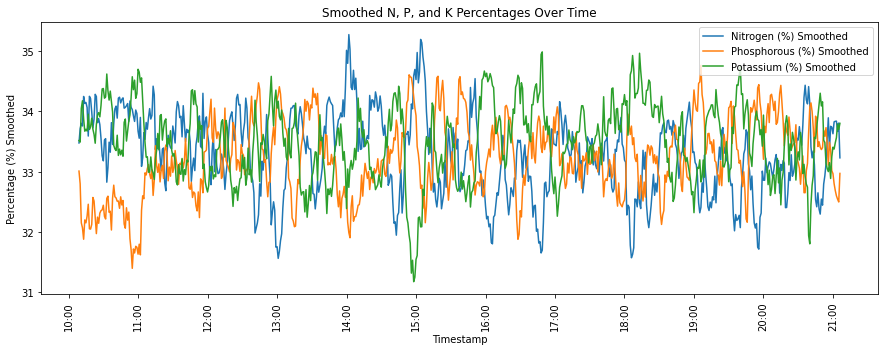

In [15]:
# Calculate rolling averages for a smoother plot
window_size = 10  # for example, a window of 10 data points
rack1_1['N_Percentage_Smooth'] = rack1_1['N_Percentage'].rolling(window=window_size).mean()
rack1_1['P_Percentage_Smooth'] = rack1_1['P_Percentage'].rolling(window=window_size).mean()
rack1_1['K_Percentage_Smooth'] = rack1_1['K_Percentage'].rolling(window=window_size).mean()

plt.figure(figsize=(15, 5))
plt.plot(rack1_1['Timestamp'], rack1_1['N_Percentage_Smooth'], label='Nitrogen (%) Smoothed')
plt.plot(rack1_1['Timestamp'], rack1_1['P_Percentage_Smooth'], label='Phosphorous (%) Smoothed')
plt.plot(rack1_1['Timestamp'], rack1_1['K_Percentage_Smooth'], label='Potassium (%) Smoothed')
plt.title('Smoothed N, P, and K Percentages Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Percentage (%) Smoothed')
plt.legend()
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Locate hours every hour
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Show only hours and minutes
plt.xticks(rotation=90)  # May need to rotate the x-axis labels to vertical if still too cluttered
plt.show()


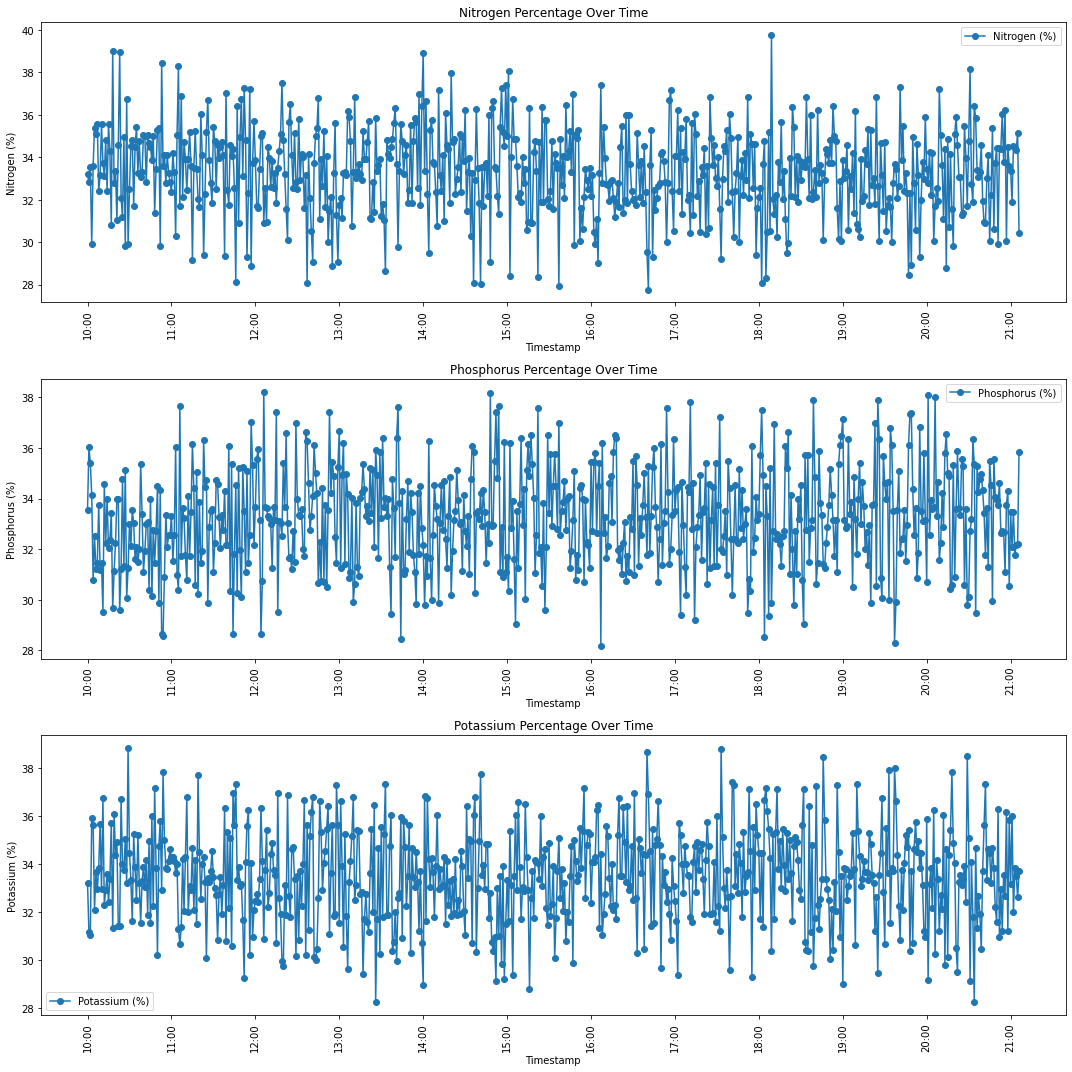

In [16]:
import matplotlib.pyplot as plt

# Define the size of the entire plotting area
plt.figure(figsize=(15, 15))

# Subplot for Nitrogen
plt.subplot(3, 1, 1)  # (number of rows, number of columns, subplot number)
plt.plot(rack1_1['Timestamp'], rack1_1['N_Percentage'], label='Nitrogen (%)', marker='o', linestyle='-')
plt.title('Nitrogen Percentage Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Nitrogen (%)')
plt.xticks(rotation=90)
plt.legend()
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Locate hours every hour
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Show only hours and minutes
# Subplot for Phosphorus
plt.subplot(3, 1, 2)
plt.plot(rack1_1['Timestamp'], rack1_1['P_Percentage'], label='Phosphorus (%)', marker='o', linestyle='-')
plt.title('Phosphorus Percentage Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Phosphorus (%)')
plt.xticks(rotation=90)
plt.legend()
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Locate hours every hour
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Show only hours and minutes
# Subplot for Potassium
plt.subplot(3, 1, 3)
plt.plot(rack1_1['Timestamp'], rack1_1['K_Percentage'], label='Potassium (%)', marker='o', linestyle='-')
plt.title('Potassium Percentage Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Potassium (%)')
plt.xticks(rotation=90)
plt.legend()
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Locate hours every hour
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Show only hours and minutes
# Adjust the layout so that all subplots fit into the figure area
plt.tight_layout()

# Show the plots
plt.show()
